<a href="https://www.kaggle.com/code/alexandrepetit881234/wip-egyptian-hieroglyph-part-1-data-exploration?scriptVersionId=139175710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="background:navajowhite;color:chocolate;padding:25px;border-radius:15px;text-align:center">Egyptian Hieroglyphs - Part1<br><br>Data Exploration</h1>

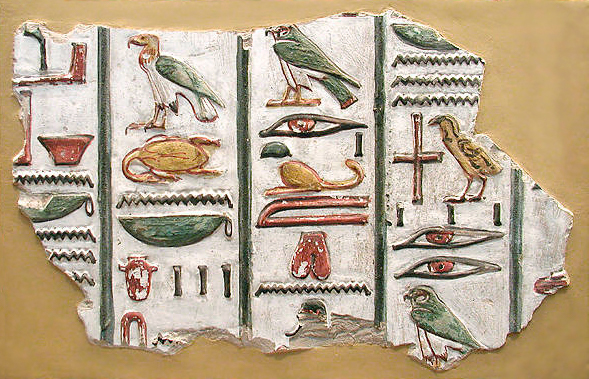

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>File CSVs</h1>
In this dataset, all the folder were already sorted and organized in CSV files. We are first going to look at the file to count the number of classes and check if the number of images is balanced

In [2]:
train = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2723 non-null   object
 1   width     2723 non-null   int64 
 2   height    2723 non-null   int64 
 3   class     2723 non-null   object
 4   xmin      2723 non-null   int64 
 5   ymin      2723 non-null   int64 
 6   xmax      2723 non-null   int64 
 7   ymax      2723 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 170.3+ KB


In [3]:
valid = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv")
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  778 non-null    object
 1   width     778 non-null    int64 
 2   height    778 non-null    int64 
 3   class     778 non-null    object
 4   xmin      778 non-null    int64 
 5   ymin      778 non-null    int64 
 6   xmax      778 non-null    int64 
 7   ymax      778 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 48.8+ KB


In [4]:
test = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  389 non-null    object
 1   width     389 non-null    int64 
 2   height    389 non-null    int64 
 3   class     389 non-null    object
 4   xmin      389 non-null    int64 
 5   ymin      389 non-null    int64 
 6   xmax      389 non-null    int64 
 7   ymax      389 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 24.4+ KB


In [5]:
def count_classes(data, name: str):
    print(f"Unique classes in {name}: {data['class'].nunique()}")
    class_count = data['class'].value_counts().reset_index()
    class_count.columns = ['class', 'count']
    
    median_value = class_count['count'].median()
    plt.figure(figsize=(12,24))
    sns.barplot(data=class_count, x='count', y='class', color="navajowhite")
    plt.axvline(x=median_value, linestyle='--')
    plt.show()

Unique classes in train: 95


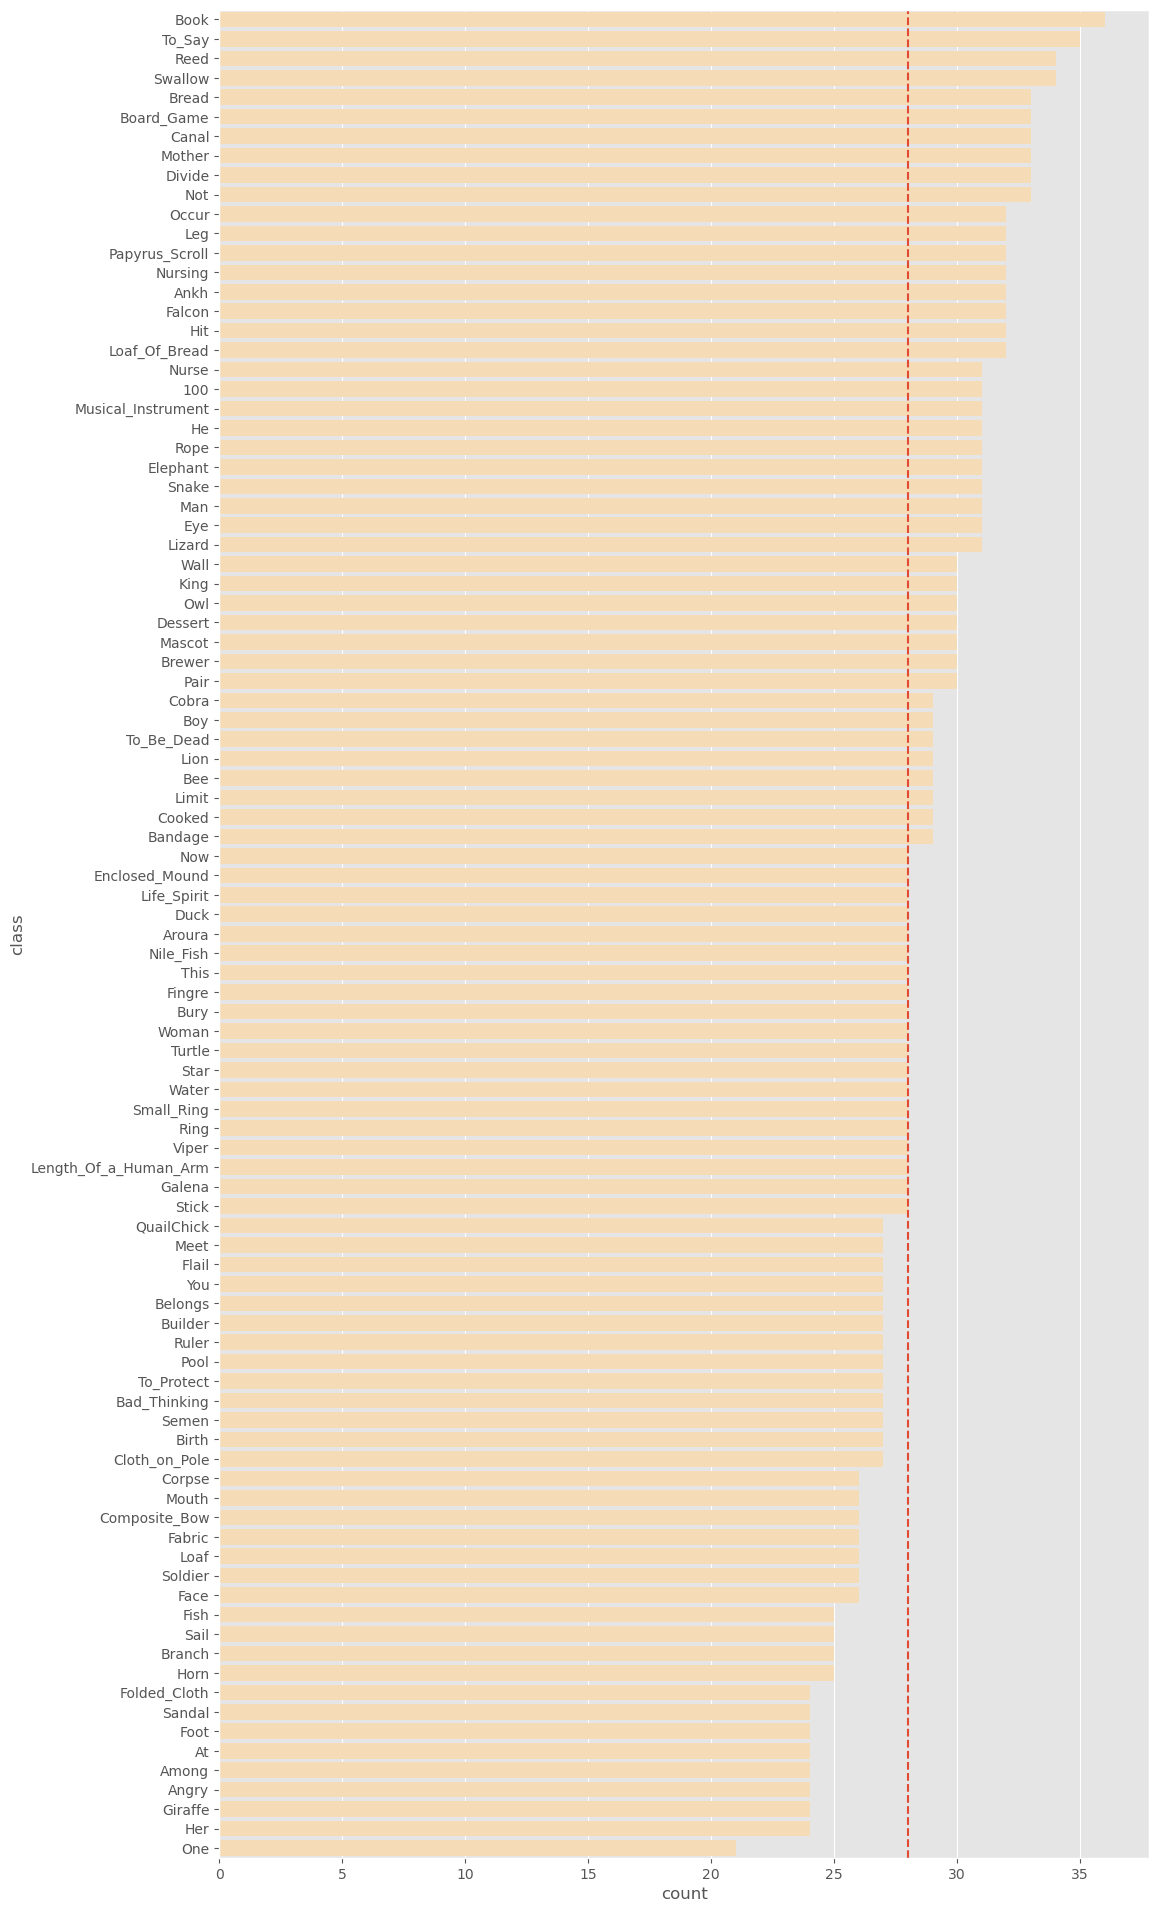

In [6]:
count_classes(train, "train")

Some classes are slightly under-represented, with a count of 21 (for a median of 28). Book is the most common class, with 36 images.

The larger images number for some category might cause some biais in our model. If the performance are not good, balancing the classes might improve the performance.

Unique classes in validation: 95


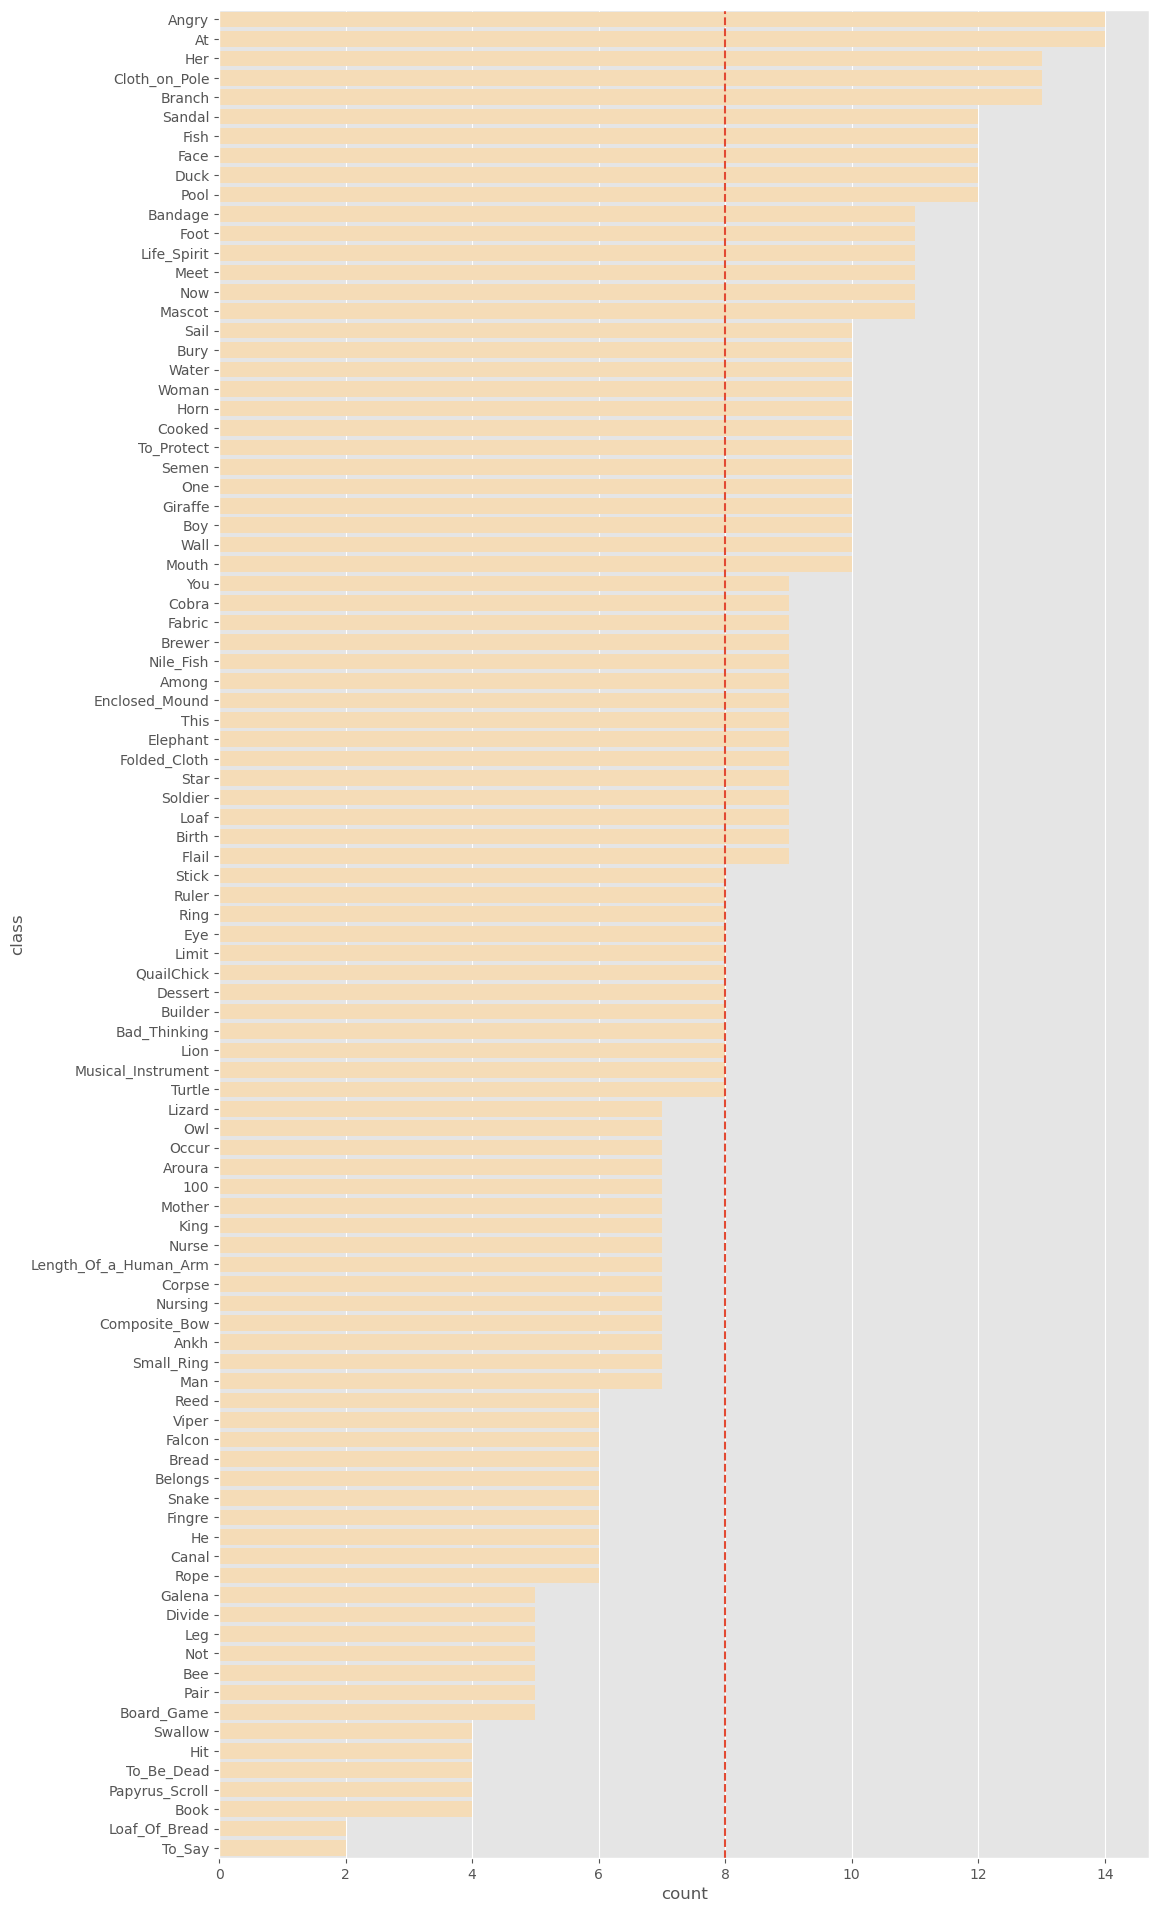

In [7]:
count_classes(valid, "validation")

Unique classes in test: 94


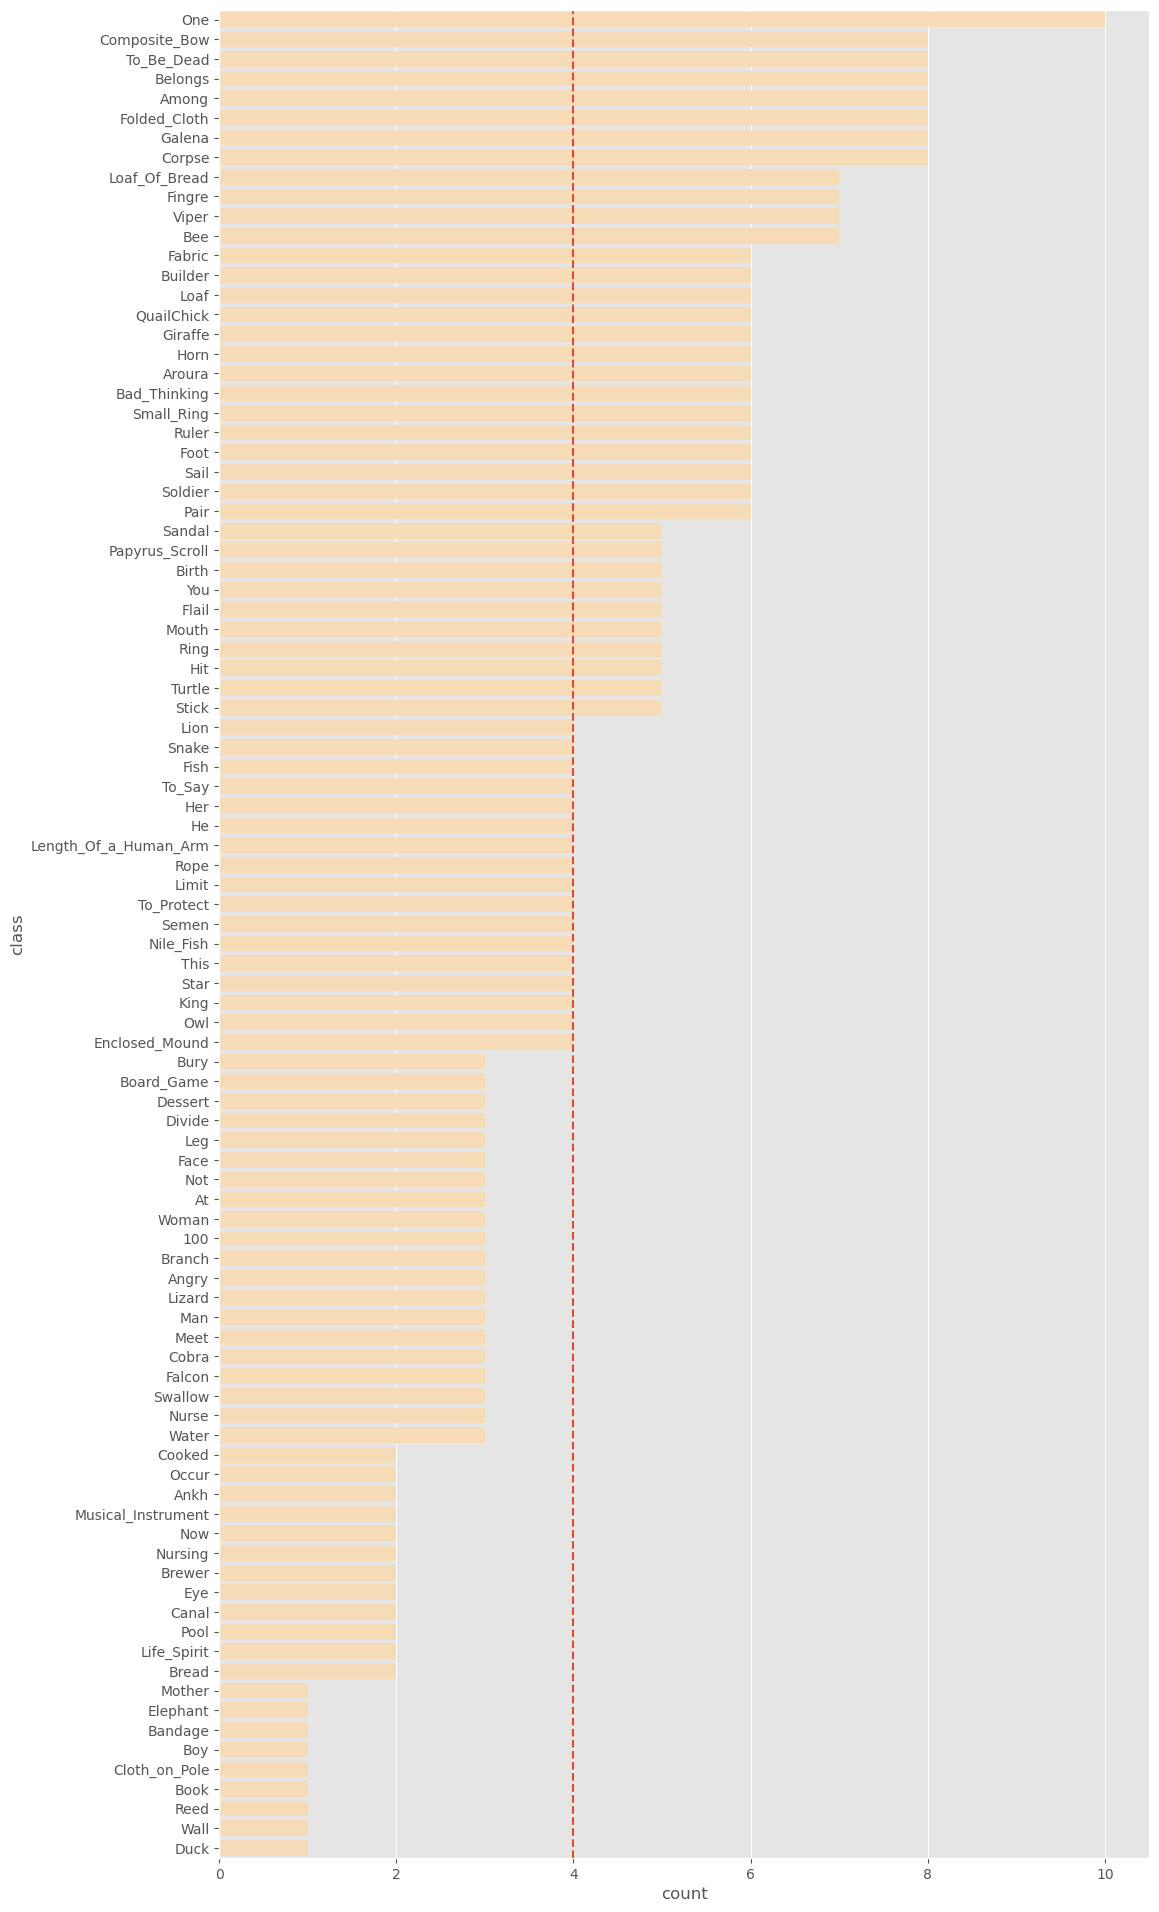

In [8]:
count_classes(test, "test")

Validation and Test splits show a bigger problem. Some classes have few images in it. It will be hard to accurately evaluate the model on these images

<h1 style="background:navajowhite;color:chocolate;padding:25px;border-radius:15px;text-align:center">2. Displaying a Sample Image for Each Class</h1>

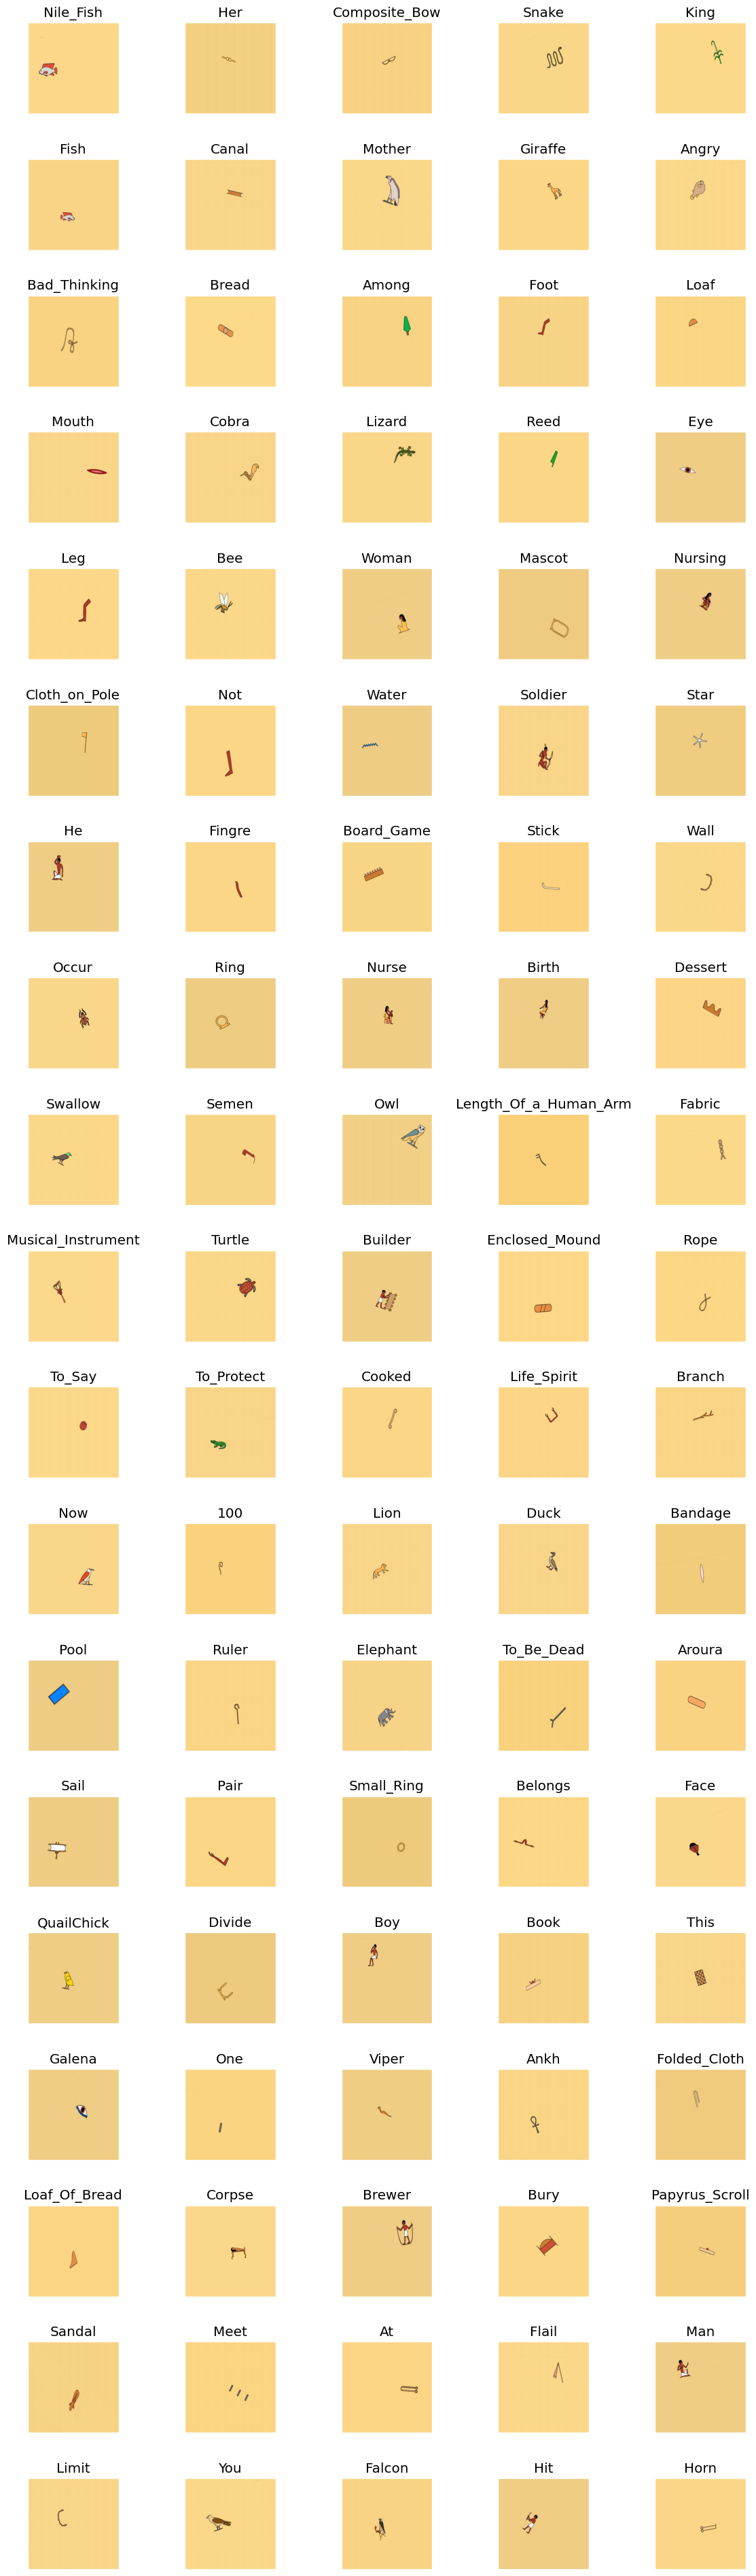

In [9]:
unique_classes = train['class'].unique()

base_path = '/kaggle/input/egyptian-hieroglyphs/train/'

i,j=0,0

fig, ax = plt.subplots(19,5, figsize=(12,38))


for cl in unique_classes:
    sample = train[train['class'] == cl].sample(1)
    
    path = base_path + sample['filename'].values[0]
    image = plt.imread(path)

    ax[j,i].imshow(image)
    ax[j,i].grid(False)
    ax[j,i].get_xaxis().set_visible(False)
    ax[j,i].get_yaxis().set_visible(False)
    ax[j,i].set_title(cl)
        
    i += 1
    if i == 5:
        i = 0
        j += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()